#### Importando dados
##### Usando como exemplo a competição do Kaggle: Credit Card Fraud Detection
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
%%time 
# serve para ver quanto tempo demora a executar o código

import pandas as pd

dados_transacoes = pd.read_csv('creditcard.csv')

dados_transacoes.head()

CPU times: user 1.06 s, sys: 162 ms, total: 1.22 s
Wall time: 1.52 s


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Análise dos dados e limpeza, se necessário

In [4]:
dados_transacoes.isnull().sum()  # Verifica se há valores ausentes

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
dados_transacoes.info() # Verifica o tipo de dado de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
n_transacoes = dados_transacoes['Class'].count()
n_fraudes = dados_transacoes['Class'].value_counts()[1]
n_transacoes_validas = dados_transacoes['Class'].value_counts()[0]

print(f'Número de transações: {n_transacoes}')
print(f'Número de fraudes: {n_fraudes}', '- %.2f' % (n_fraudes / n_transacoes * 100), '%')
print(f'Número de transações válidas: {n_transacoes_validas}', '- %.2f' % (n_transacoes_validas / n_transacoes * 100), '%')


Número de transações: 284807
Número de fraudes: 492 - 0.17 %
Número de transações válidas: 284315 - 99.83 %


### Treinando os dados

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit ## para dividir os dados em treino e teste de forma proporcional em casos de classes desbalanceadas como é o caso de fraudes em transações financeiras dos dados importados

validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0) # n_splits=1 significa que vamos dividir os dados em treino e teste apenas uma vez, test_size=0.1 significa que 10% dos dados serão usados para teste e random_state=0 garante que a divisão seja reproduzível (ou seja, sempre que você executar o código, obterá a mesma divisão dos dados).

X = dados_transacoes.drop('Class', axis=1).values
y = dados_transacoes['Class'].values

for treino_id, teste_id in validador.split(X, y):
    X_train, X_test = X[treino_id], X[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]

In [8]:
%%time
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plotar_arvore_decisao(arvore, nome_arquivo):
  """Plota a árvore de decisão e salva em um arquivo."""
  plt.figure(figsize=(200,100))
  tree.plot_tree(arvore, filled=True) # filled=True preenche os nós com cores diferentes de acordo com a classe prevista
  plt.savefig(nome_arquivo)
  plt.close()


modelo_classificacao = tree.DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) 
"""Divisão dos dados em treino e teste, mantendo a proporção das classes
X_train e y_train são os dados de treino, enquanto X_test e y_test são os dados de teste. O parâmetro test_size=0.1 indica que 10% dos dados serão usados para teste, enquanto o restante (90%) será usado para treino. O random_state=0 garante que a divisão seja reproduzível, ou seja, sempre que você executar o código, obterá a mesma divisão dos dados.""" 

# Treinamento do modelo
arvore = modelo_classificacao.fit(X_train, y_train)
y_pred = arvore.predict(X_test)

# Plotando a árvore de decisão
plotar_arvore_decisao(arvore, 'arvore_decisao.png')


CPU times: user 22.8 s, sys: 556 ms, total: 23.3 s
Wall time: 23.9 s


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

def avaliar_modelo(y_test, y_pred):
    """Avalia o modelo de classificação e imprime as métricas de desempenho."""
    acuracia = (accuracy_score(y_test, y_pred)*100)
    matriz_confusao = confusion_matrix(y_test, y_pred)
    recall = (recall_score(y_test, y_pred)* 100)
    precisao = (precision_score(y_test, y_pred)* 100)
    
    print(f'Acurácia: {acuracia:.2f}')
    print('Matriz de Confusão:')
    print(matriz_confusao)
    print(f'Recall: {recall:.2f} %')
    print(f'Precisão: {precisao:.2f} %')

In [10]:
avaliar_modelo(y_test, y_pred)
# se acuracia for 1 então o modelo está perfeito, mas isso é muito raro, então se for acima de 0.9 já é um bom resultado

Acurácia: 99.90
Matriz de Confusão:
[[28411    15]
 [   13    42]]
Recall: 76.36 %
Precisão: 73.68 %


In [11]:
arvore.get_depth()
# retorna a profundidade da árvore de decisão, ou seja, o número máximo de nós do caminho mais longo da raiz até uma folha. Quanto maior a profundidade, mais complexa é a árvore e mais propensa a overfitting ela pode ser.

21

In [12]:
#execucao do classificador DecisionTreeClassifier
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=10, random_state=0) # max_depth=10 limita a profundidade da árvore de decisão para evitar overfitting (quando o modelo aprende demais os dados de treino, decorando os detalhes, mas não consegue generalizar para novos dados), random_state=0 garante que a divisão seja reproduzível

arvore = classificador_arvore_decisao.fit(X_train, y_train)

y_pred = arvore.predict(X_test)

avaliar_modelo(y_test, y_pred)

Acurácia: 99.93
Matriz de Confusão:
[[28418     8]
 [   13    42]]
Recall: 76.36 %
Precisão: 84.00 %


Metáfora: o aluno "decorador"
Imagine que você está treinando um aluno para uma prova.

Se ele entende os conceitos, vai bem em qualquer prova.

Se ele decorou as respostas da apostila, ele só vai bem na mesma prova.
Se mudar a pergunta, ele se perde.

Isso é overfitting: o modelo se saiu super bem no treino, mas erra muito no teste.

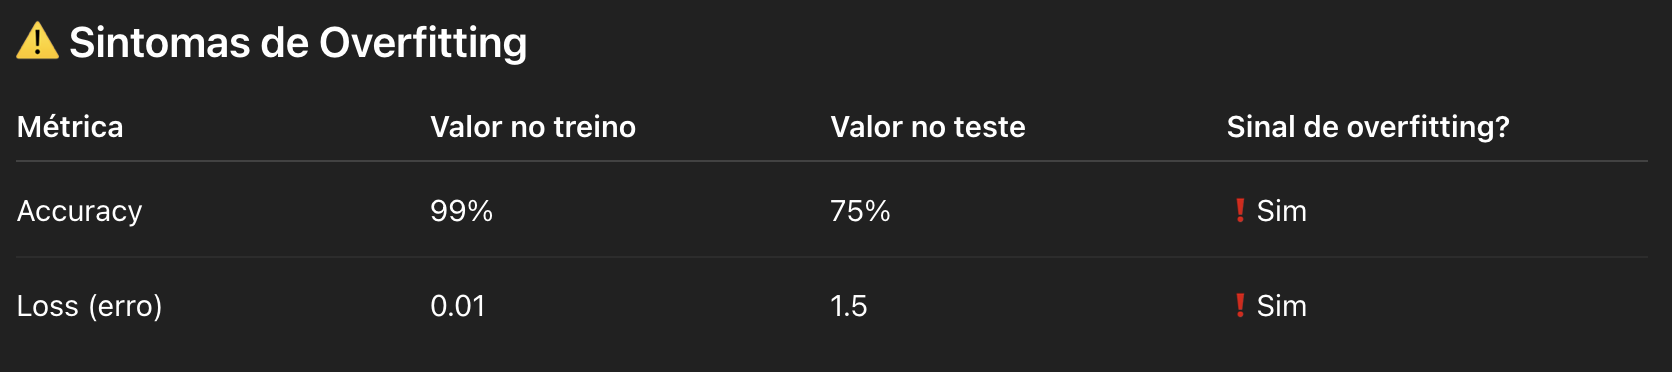
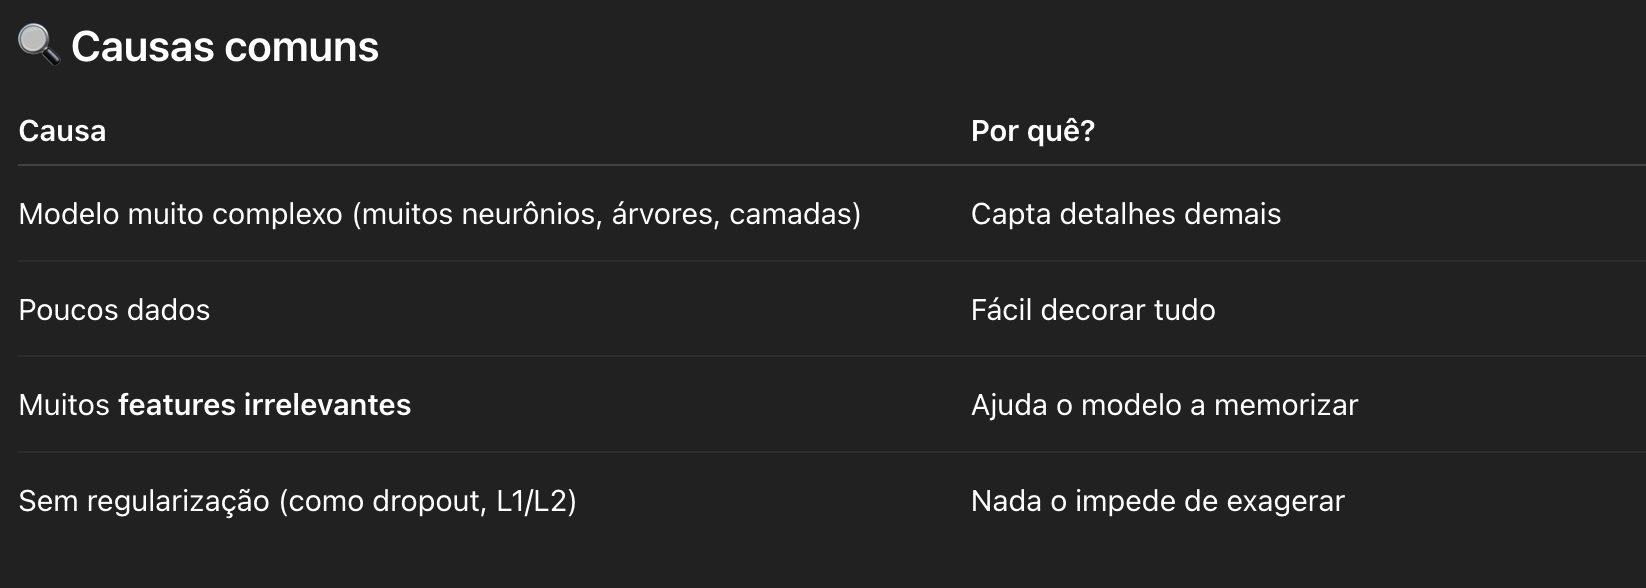
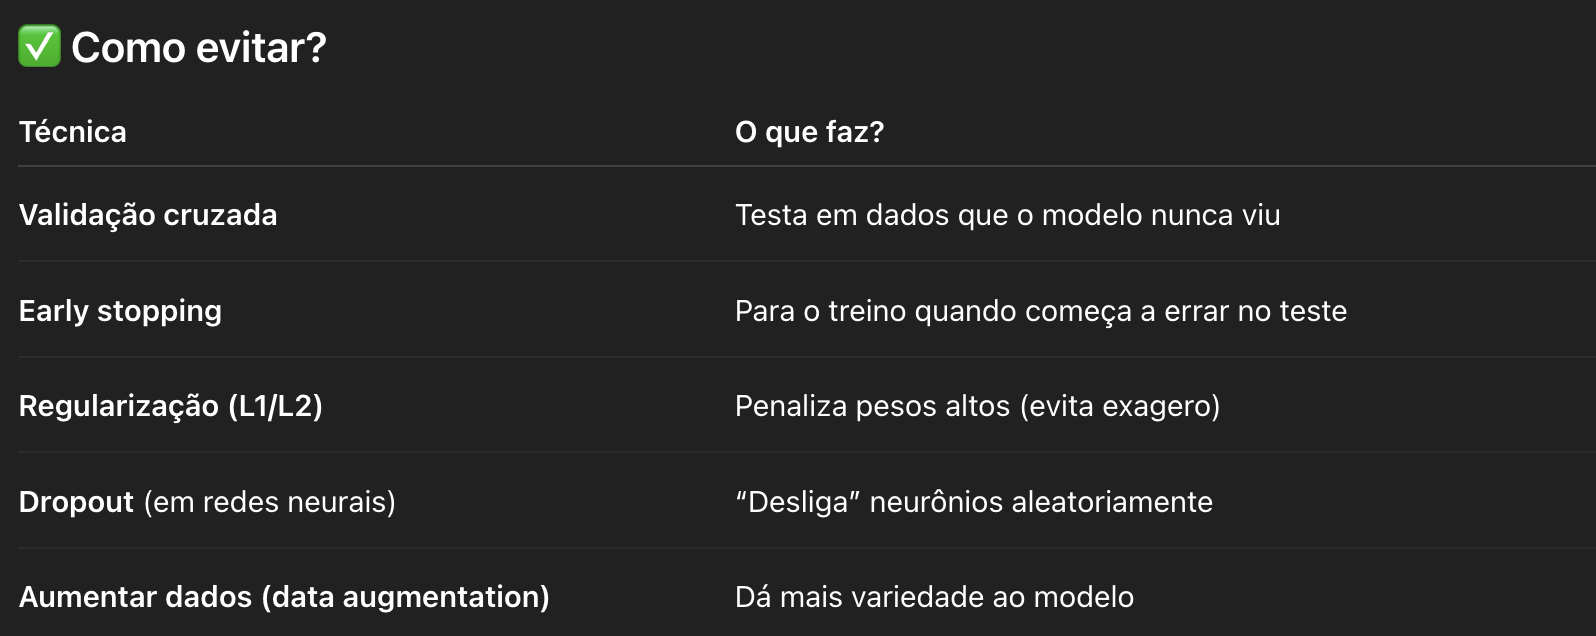

In [ ]:
#execucao do classificador DecisionTreeClassifier

#intanciando modelo 
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=15, random_state=0) # max_depth=15 limita a profundidade da árvore de decisão para evitar overfitting (quando o modelo aprende demais os dados de treino, decorando os detalhes, mas não consegue generalizar para novos dados), random_state=0 garante que a divisão seja reproduzível

# treinando o modelo
arvore = classificador_arvore_decisao.fit(X_train, y_train)

# fazendo previsões
y_pred = arvore.predict(X_test)

# avaliando o modelo
avaliar_modelo(y_test, y_pred)

Acurácia: 99.91
Matriz de Confusão:
[[28413    13]
 [   13    42]]
Recall: 76.36 %
Precisão: 76.36 %


In [14]:
#execucao do classificador DecisionTreeClassifier
classificador_arvore_decisao = tree.DecisionTreeClassifier(max_depth=5, random_state=0) # max_depth=15 limita a profundidade da árvore de decisão para evitar overfitting (quando o modelo aprende demais os dados de treino, decorando os detalhes, mas não consegue generalizar para novos dados), random_state=0 garante que a divisão seja reproduzível

arvore = classificador_arvore_decisao.fit(X_train, y_train)

y_pred = arvore.predict(X_test)

avaliar_modelo(y_test, y_pred)

Acurácia: 99.93
Matriz de Confusão:
[[28419     7]
 [   12    43]]
Recall: 78.18 %
Precisão: 86.00 %


comparando entre os max_depth, por exemplo o nivel 5 ficou bom comparando com 10 ou 15 ou 21

In [15]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest é um algoritmo de aprendizado de máquina que combina várias árvores de decisão para melhorar a precisão e reduzir o overfitting. Ele cria um "conjunto" de árvores de decisão
classificador_arvore_decisao = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0) # n_estimators=50 significa que o modelo irá criar 50 árvores de decisão diferentes, max_depth=10 limita a profundidade de cada árvore para evitar overfitting, random_state=0 garante que a divisão seja reproduzível
arvore = classificador_arvore_decisao.fit(X_train, y_train)
y_pred = arvore.predict(X_test)
avaliar_modelo(y_test, y_pred)

Acurácia: 99.94
Matriz de Confusão:
[[28420     6]
 [   12    43]]
Recall: 78.18 %
Precisão: 87.76 %


In [16]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest é um algoritmo de aprendizado de máquina que combina várias árvores de decisão para melhorar a precisão e reduzir o overfitting. Ele cria um "conjunto" de árvores de decisão
classificador_arvore_decisao = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0) # n_estimators=50 significa que o modelo irá criar 50 árvores de decisão diferentes, max_depth=10 limita a profundidade de cada árvore para evitar overfitting, random_state=0 garante que a divisão seja reproduzível
arvore = classificador_arvore_decisao.fit(X_train, y_train)
y_pred = arvore.predict(X_test)
avaliar_modelo(y_test, y_pred)

Acurácia: 99.94
Matriz de Confusão:
[[28420     6]
 [   12    43]]
Recall: 78.18 %
Precisão: 87.76 %


como no random forest gera varias arvores, para ver cada ou salvar precisamos passar qual [n]

In [20]:
plotar_arvore_decisao(arvore[0], 'arvore_decisao_random_forest.png')
plotar_arvore_decisao(arvore[1], 'arvore_decisao_random_forest2.png')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost é um algoritmo de aprendizado de máquina que combina vários classificadores fracos para criar um classificador forte. Ele ajusta iterativamente os pesos dos exemplos de treinamento, dando mais importância aos exemplos que foram classificados incorretamente nas iterações anteriores.
classificador_arvore_decisao = AdaBoostClassifier(n_estimators=50, random_state=0) # n_estimators=50 significa que o modelo irá criar 50 classificadores fracos diferentes, random_state=0 garante que a divisão seja reproduzível
arvore = classificador_arvore_decisao.fit(X_train, y_train)
y_pred = arvore.predict(X_test)
avaliar_modelo(y_test, y_pred)
plotar_arvore_decisao(arvore[2], 'arvore_decisao_adaboost.png')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
